In [6]:
using LinearAlgebra, ColorBitstring, Plots

# 1. IntervalArithmetic.jl

In [16]:
using IntervalArithmetic

x = Interval(1)/5
y = 1 + x

println(y.lo)
println(y.hi)

1.2
1.2000000000000002


In [20]:
x = exp(Interval(1))
println(x.lo)
print(x.hi)

2.718281828459045
2.7182818284590455

In [21]:
# compute e to 1000 digits

In [26]:
typeof(Interval(1.0))

Interval{Float64}

In [27]:
typeof(Interval(big(1.0)))

Interval{BigFloat}

In [36]:
setprecision(3_000) do # number of signficand bits
    x = exp(Interval(big(1.0)))
    println(x.lo)
    print(x.hi)
end

2.7182818284590452353602874713526624977572470936999595749669676277240766303535475945713821785251664274274663919320030599218174135966290435729003342952605956307381323286279434907632338298807531952510190115738341879307021540891499348841675092447614606680822648001684774118537423454424371075390777449920695517027618386062613313845830007520449338265602976067371132007093287091274437470472306969772093101416928368190255151086574637721112523897844250569536967707854499699679468644549059879316368892300987931277361782154249992295763514822082698951936680331825288693984964651058209392398294887933203625094431173012381970684161403970198376793206832823764648042953118023287825098194558153017567173613320698112509961818815930416903515988885193458072738667385894228792284998920868058257492796104841984443634632449684875602336248270419786232090021609902353043699418491463140934317381436405462531520961836908887070167652
2.7182818284590452353602874713526624977572470936999595749669676277240766303535475945713821785

In [38]:
setprecision(3_000) do # number of signficand bits
    x = 2asin(Interval(big(1.0)))
    println(x.lo)
    print(x.hi)
end

3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035955
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253

In [45]:
n = 100
x = Interval(1)
T = typeof(x)
o = ones(T,n-1)
Tridiagonal(o, Vector{T}((1:n)/x), o) \ [1; zeros(n-1)]

100-element Vector{Interval{Float64}}:
  [2.57592, 2.57593]
 [-1.57593, -1.57592]
  [0.57592, 0.575921]
 [-0.151841, -0.15184]
  [0.0314422, 0.0314423]
 [-0.00537061, -0.0053706]
  [0.000781381, 0.000781382]
 [-9.90642e-05, -9.90641e-05]
  [1.11319e-05, 1.1132e-05]
 [-1.12349e-06, -1.12348e-06]
  [1.0292e-07, 1.02921e-07]
 [-8.63232e-09, -8.63231e-09]
  [6.6771e-10, 6.67711e-10]
   ⋮
  [2.67574e-136, 2.67575e-136]
 [-2.97342e-138, -2.97341e-138]
  [3.26787e-140, 3.26788e-140]
 [-3.55246e-142, -3.55245e-142]
  [3.82028e-144, 3.82029e-144]
 [-4.06459e-146, -4.06458e-146]
  [4.27897e-148, 4.27898e-148]
 [-4.45775e-150, -4.45774e-150]
  [4.5961e-152, 4.59611e-152]
 [-4.69039e-154, -4.69038e-154]
  [4.73823e-156, 4.73824e-156]
 [-4.73824e-158, -4.73823e-158]

In [55]:
n = 50
A = randn(n,n);

In [59]:
(A) \ [1; zeros(n-1)]

50-element Vector{Float64}:
  0.09114260953648173
 -0.05967647453042956
 -0.2305742875137488
 -0.06680422271423832
 -0.44438907574373826
 -0.12045846546967151
 -0.32740694132488335
  0.3114744973080232
  0.061515902032504316
  0.02671059423302417
  0.09399621812278754
 -0.01204338118887417
 -0.38399733608801717
  ⋮
 -0.325742489758591
 -0.1703947805229125
  0.1121580069286252
  0.10261241976575919
 -0.014219308639868141
  0.413494945925463
 -0.1924888670105587
  0.13380509311003336
  0.2860933387785968
  0.17177721770176974
 -0.027624792946914695
  0.0383323630761978

In [60]:
Interval.(A) \ [1; zeros(n-1)]

50-element Vector{Interval{Float64}}:
 [-109196, 109196]
 [-124243, 124243]
           [-56342.2, 56341.8]
           [-68716.6, 68716.4]
           [-55662.3, 55661.4]
           [-44107.4, 44107.2]
           [-21279.8, 21279.1]
            [-9927.66, 9928.29]
    [-12473, 12473.2]
            [-4463.38, 4463.43]
            [-5135.8, 5135.99]
            [-5571.84, 5571.82]
            [-2332.4, 2331.63]
                 ⋮
               [-0.569501, -0.081711]
               [-0.371294, 0.0307084]
               [-0.0142663, 0.238499]
               [-0.0686573, 0.27382]
               [-0.071808, 0.0430442]
                [0.354396, 0.47256]
               [-0.216608, -0.167789]
                [0.109675, 0.157728]
                [0.249495, 0.322001]
                [0.149252, 0.19307]
               [-0.033725, -0.0220872]
                [0.0308908, 0.046526]

In [62]:
x = Interval(-1,1)
x - x # should be [0,0] if we knew the co-dependencies

[-2, 2]

### pitfalls of interval arithmetic

# 2. Dual numbers

Q: Can we combine complex numbers with Dual Numbers? YES!

In [98]:
# Dual(a,b) represents a + b*ϵ
struct Dual{T}
    a::T
    b::T
end

# Dual(a) represents a + 0*ϵ
Dual(a::Real) = Dual(a, zero(a)) # for real numbers we use a + 0ϵ

# Allow for a + b*ϵ syntax
const ϵ = Dual(0, 1)

import Base: +, *, -, /, ^, zero, exp, cos, one, sin

one(d::Dual) = Dual(one(d.a), zero(d.b))

# support polynomials like 1 + x, x - 1, 2x or x*2 by reducing to Dual
+(x::Real, y::Dual) = Dual(x) + y
+(x::Dual, y::Real) = x + Dual(y)
-(x::Real, y::Dual) = Dual(x) - y
-(x::Dual, y::Real) = x - Dual(y)
*(x::Real, y::Dual) = Dual(x) * y
*(x::Dual, y::Real) = x * Dual(y)

# support x/2 (but not yet division of duals)
/(x::Dual, k::Real) = Dual(x.a/k, x.b/k)

# a simple recursive function to support x^2, x^3, etc.
function ^(x::Dual, k::Integer)
    if k < 0
        error("Not implemented")
    elseif k == 1
        x
    else
        x^(k-1) * x
    end
end

# Algebraic operationds for duals
-(x::Dual) = Dual(-x.a, -x.b)
+(x::Dual, y::Dual) = Dual(x.a + y.a, x.b + y.b)
-(x::Dual, y::Dual) = Dual(x.a - y.a, x.b - y.b)
*(x::Dual, y::Dual) = Dual(x.a*y.a, x.a*y.b + x.b*y.a)

exp(x::Dual) = Dual(exp(x.a), exp(x.a) * x.b)
cos(x::Dual) = Dual(cos(x.a), -sin(x.a) * x.b)
sin(x::Dual) = Dual(sin(x.a), cos(x.a) * x.b)

sin (generic function with 26 methods)

Can we differentiate
$$
e^{cos(x+iy)}
$$
with respect to x (same as differentiating $e^{cos(z)}$ with respect to $z$)
at the point $x + i*y = 1 +2i$

In [67]:
z = Dual(1.0+2.0im, 1.0 + 0.0im)
f = z -> exp(cos(z))
f(z)

Dual{ComplexF64}(-7.604156595433161 - 0.6838887029491975im, 22.732926546437596 + 17.066153344771642im)

In [69]:
-sin(z.a)exp(cos(z.a))

22.732926546437596 + 17.066153344771642im

## ForwardDiff.jl

A package for forward-mode automatic differentiation using Dual number

In [70]:
using ForwardDiff
import ForwardDiff: derivative, gradient

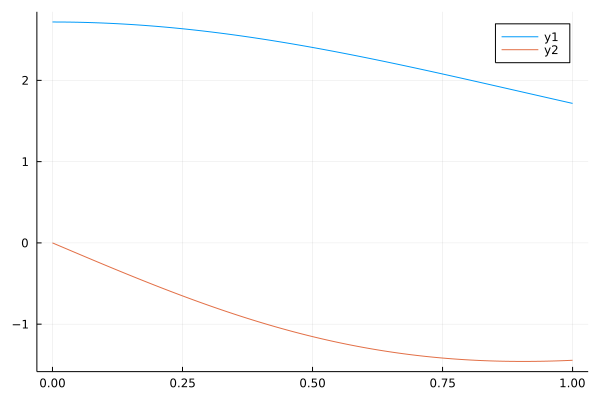

In [79]:
f = x -> exp(cos(x))
fp = x -> derivative(f, x)

x = range(0,1; length=1000)
plot(x, f.(x))
plot!(x, fp.(x))

In [83]:
f = function(𝐱)
    (x,y) = 𝐱
    cos(y*exp(x))
end

#53 (generic function with 1 method)

In [84]:
f([0.2,0.3])

0.9336156550988468

In [85]:
gradient(f, [0.2,0.3])

2-element Vector{Float64}:
 -0.13127984788677705
 -0.43759949295592354

## Dual numbers and higher order derivatives

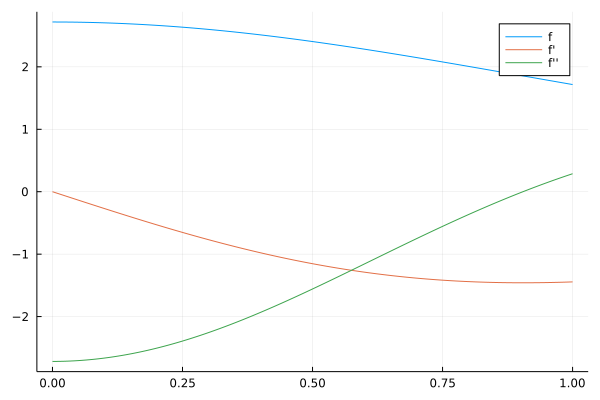

In [89]:
f = x -> exp(cos(x))
fp = x -> derivative(f, x)
fpp = x -> derivative(fp, x)

x = range(0,1; length=1000)
plot(x, f.(x); label="f")
plot!(x, fp.(x); label="f'")
plot!(x, fpp.(x); label="f''")

In [100]:
f = x -> exp(cos(x))
fp = x -> f(Dual(x, one(x))).b

#83 (generic function with 1 method)

In [102]:
fp(Dual(0.0, 1.0))

Dual{Float64}(-0.0, -2.718281828459045)

In [105]:
# Why does this compute the second derivative?

f(Dual(Dual(0.0,1.0), Dual(1.0,0.0)))

# Encourage you to try to figure out why this works with pen-and-paper

Dual{Dual{Float64}}(Dual{Float64}(2.718281828459045, -0.0), Dual{Float64}(-0.0, -2.718281828459045))

## Correct solution to Q4.3

In [106]:
x = 2.0^53
x + 1 == x

true

In [110]:
y = nextfloat(x)
y + 1 == y

false

In [111]:
printlnbits(x)
printbits(x + 1)

0100001101000000000000000000000000000000000000000000000000000000
0100001101000000000000000000000000000000000000000000000000000000

In [112]:
printlnbits(y)
printbits(y + 1)

0100001101000000000000000000000000000000000000000000000000000001
0100001101000000000000000000000000000000000000000000000000000010

In [120]:
x = 2.0^54
x + 1 == x
y = nextfloat(y)
y + 1 == y
z = prevfloat(x)
z + 1 ≠ z

true

In [121]:
printbits(x)

0100001101010000000000000000000000000000000000000000000000000000